# SIN INTELLIGENT SYSTEMS - Lab assignment 2

## Supervised learning: Perceptron algorithm and logistic regression

In this lab assignment 2 on machine learning, we will develop pattern recognition systems based on the perceptron algorithm and logistic regression, applying them to several classification tasks (including flower species classification and handwritten text recognition).

This lab assignment 2 will be divided in 4 lab sessions, followed by an additional session for lab exam 2.

- Session 1: Study of the Iris and Digits standard datasets. Creation of the MyDigits dataset.
- Session 2: Application of the Perceptron algorithm to several classification tasks.
- Session 3: Application of Logistic Regression to several classification tasks.
- Session 4: Additional exercises to prepare for lab exam 2.
- Session 5: Lab exam 2.

<p style="page-break-after:always;"></p>

# **Session 1**

In this first session we will familiarize ourselves with the working environment and some datasets, starting with *Iris*. Then, you can follow with *Digits*. Finally, you will create your own *MyDigits* dataset.

You may need to run this code if this is the first time you are running this notebook.

In [12]:
!pip install seaborn scikit-learn pandas pillow gradio matplotlib

<p style="page-break-after:always;"></p>

# The Iris dataset

The Iris dataset has been widely used to introduce basic machine learning concepts and methods. It consists of $N=150$ samples, $50$ for each of $C=3$ classes, represented by vectors of $D=4$ homogeneous real features. One of the classes is linearly separable from the rest, but the other two are not linearly separable. Although today it is considered a "toy" dataset, it is still very useful for introducing basic concepts and methods.

First we import some standard and sklearn libraries:

In [13]:
import warnings; warnings.filterwarnings("ignore");
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

Reading the Iris dataset:

In [14]:
iris = load_iris()
print(dir(iris))
X = iris.data 
y = iris.target
fn = iris.feature_names
cn = iris.target_names
print(iris.DESCR)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

<p style="page-break-after:always;"></p>

We convert the corpus into a pandas dataframe to facilitate its description:

In [15]:
data = pd.DataFrame(data=X, columns=fn)
data['species'] = pd.Series(iris.target_names[y], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<p style="page-break-after:always;"></p>

Let's look at some basic statistics:

In [16]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We check that we have $50$ samples of each class:

In [17]:
data.groupby('species', observed=False).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<p style="page-break-after:always;"></p>

Since we have few features, it's a good idea to make a scatter matrix plot:

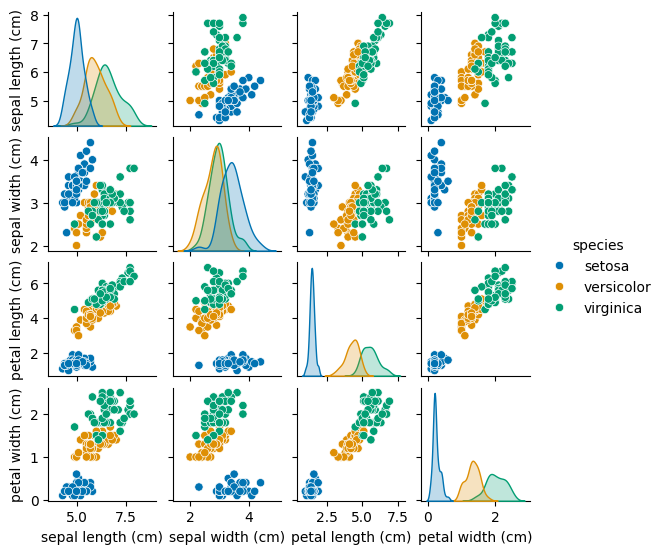

In [18]:
sns.pairplot(data, hue="species", height = 1.4, palette = 'colorblind');

**Question:** which class is linearly separated from the other two?<br><br>
"Setosa" is clearly linearly separated from the other 2 species. There is always a line we can trace that separates it from the others.

# The Digits dataset

Like iris, Digits can be considered a "toy" dataset. However, compared to iris, Digits represents a jump of complexity due to the greater number of classes, $C=10$, samples, $N=1797$, and dimension of feature vectors, $D=64$. In addition, digits addresses one of the main perceptual tasks of machine learning: optical character recognition (OCR) and, more specifically, handwritten digit recognition. Although handwritten digit recognition has been considered a "solved" task since the 1990s, image classification in general remains a complex task of great academic and commercial interest. So the relative simplicity of Digits is very convenient as an introductory task to image classification.

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<p style="page-break-after:always;"></p>

Let's see some images:

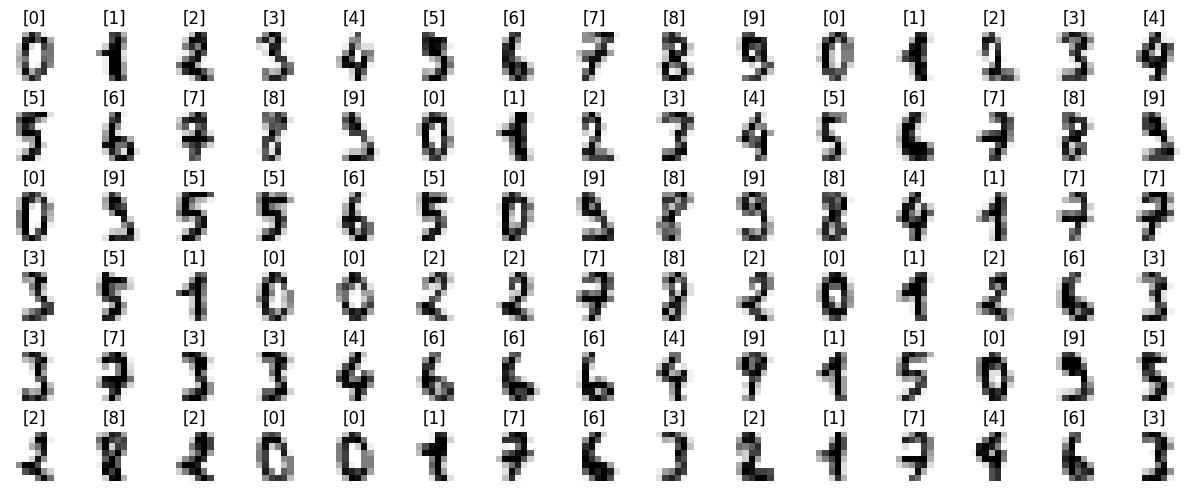

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = digits.images.astype(np.float16).reshape(-1, 8*8); X/=np.max(X)
y = digits.target.astype(np.uint).reshape(-1, 1);
nrows = 6; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12*nrows/ncols), constrained_layout=True)
for ax, xn, yn in zip(axs.flat, X, y):
  ax.set_axis_off(); image = xn.reshape(8, 8); ax.set_title(yn)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

<p style="page-break-after:always;"></p>

# Create MyDigits dataset

The following simple application allows you to create your own Digits dataset. When you run this application, it shows a basic graphical interface containing a panel on which you can draw your own handwritten digits.

Before you can draw a digit, you need to click on the *pen* locate on the left vertical. Then you can draw on the panel. If you need to erase what you have drawn on the panel, just click on *Undo* located on the top menu. 

The usual process to acquire your Digits dataset is to draw a digit, provide the class label and click on "Save image". You should acquire at least 10 samples for each digit (0 to 9), that is, 100 samples in total. Once you finish, you can save your dataset, by providing a filename for image and a filename for labels and clicking on "Save dataset".

In addition to saving data, it is also possible to load data using the "Load dataset" button. The file names for the images and labels must be provided using the same input text boxes used in saving. **Warning!** Loading data deletes the current data in memory.

Finally, there is also a "Merge dataset" button for merging two datasets. It works exactly the same way as "Load dataset", except that instead of deleting the current data in memory, it merges it with the loaded data.

In [22]:
# Execute this cell only when running in Google Colab 
# You need to upload DigitCaptureGradioApp.py

# from google.colab import files
# uploaded = files.upload()

In [23]:
import warnings; warnings.filterwarnings("ignore");
import numpy as np
import DigitCaptureGradioApp as dca

demo = dca.DigitCaptureApp()
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


<p style="page-break-after:always;"></p>

In [25]:
# Execute this cell only when running in Google Colab 
# You need to download your dataset: images.npy labels.npy
# files.download('images.npy')
# files.download('labels.npy')

**Check the images and labels of your dataset:**

In [43]:
fd = open('images.npy', 'rb')
X = np.load(fd)
fd.close()

fd = open('labels.npy', 'rb')
y = np.load(fd).astype(int)
fd.close()

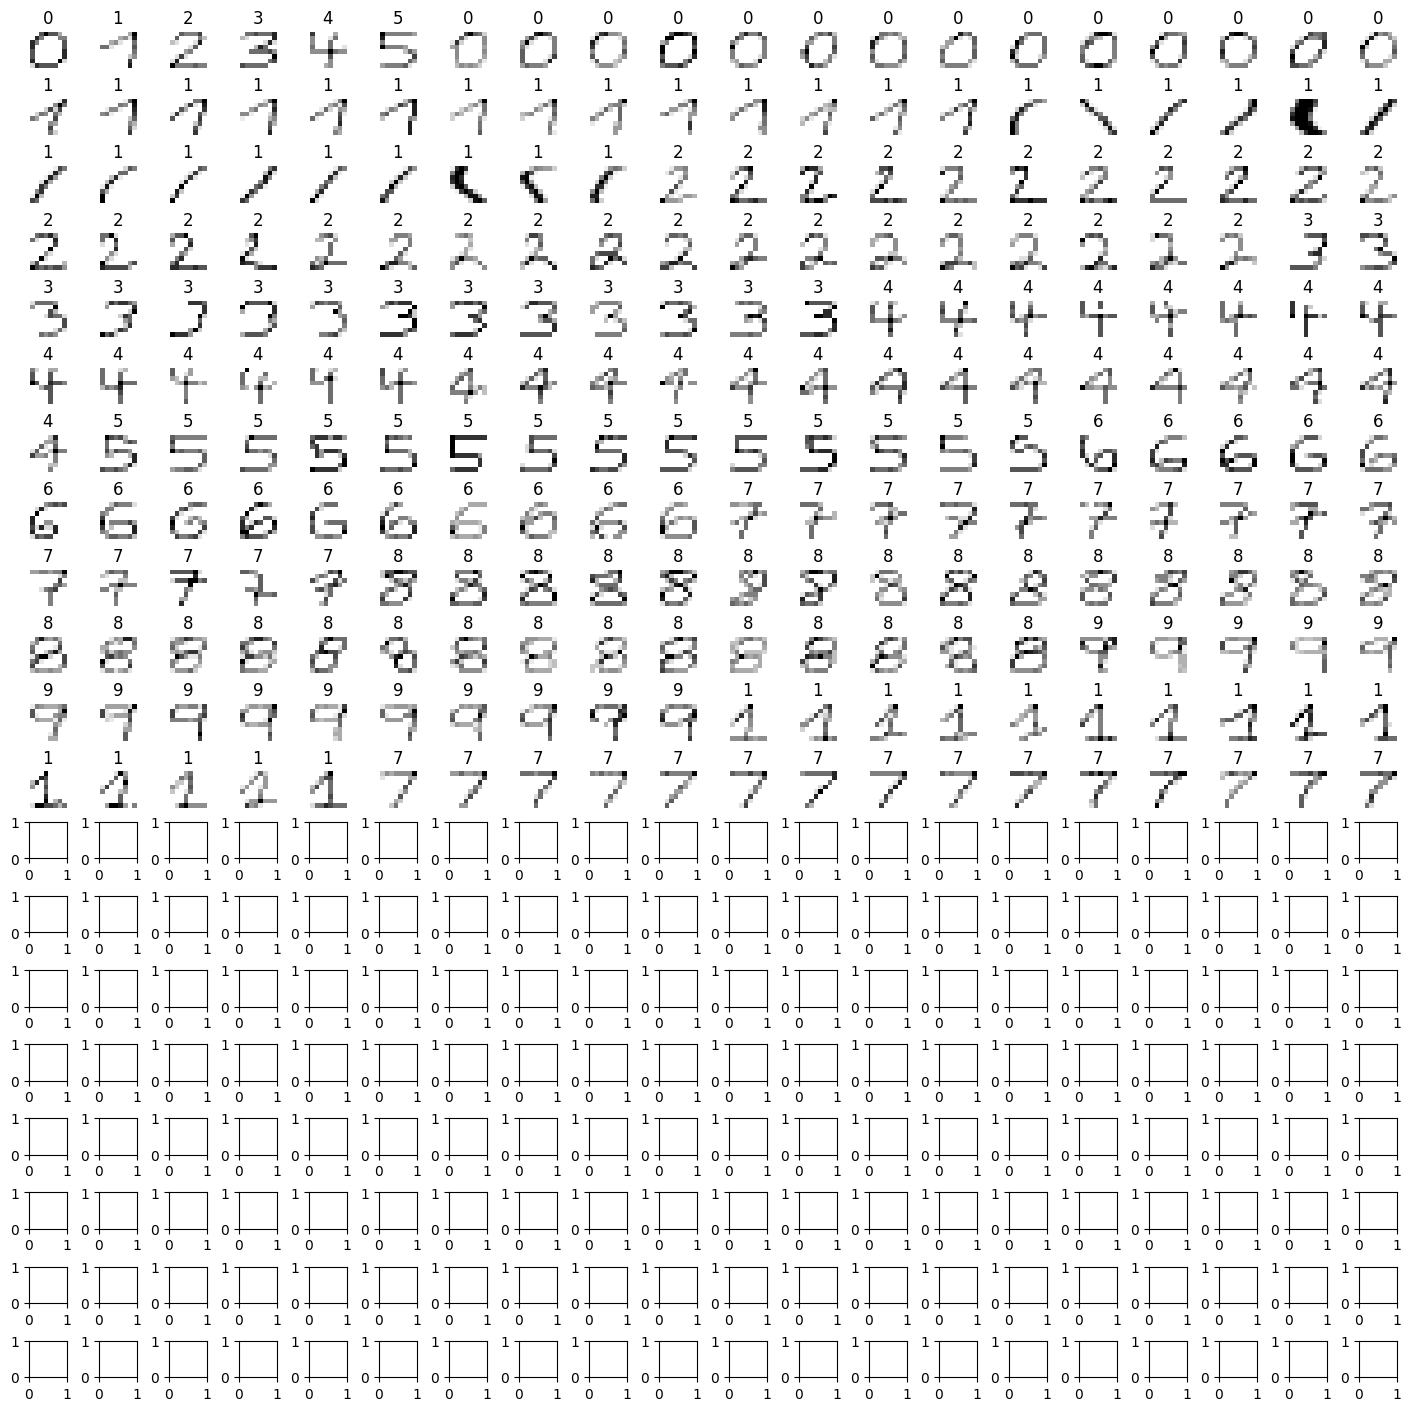

In [44]:
import matplotlib.pyplot as plt
nrows = 20; ncols = 20
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14*nrows/ncols), constrained_layout=True)
for ax, xn, yn in zip(axs.flat, X, y):
  ax.set_axis_off(); image = xn.reshape(8, 8); ax.set_title(yn)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")